<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
house_csv = "../../data/Sacramento_transactions.csv"
df=pd.read_csv(house_csv)
df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [3]:
df.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


Reordering columns to have our target variable on the far right

In [4]:
df_no_price = df.drop('price', axis=1)

# Concatenate the removed column 'price' to the right side
df = pd.concat([df_no_price, df['price']], axis=1)

df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,latitude,longitude,price
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,38.631913,-121.434879,59222
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,38.478902,-121.431028,68212
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,38.618305,-121.443839,68880
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,38.616835,-121.439146,69307
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,38.519470,-121.435768,81900


In [5]:
df = df.drop('street', axis=1)

In [6]:
df.shape

(985, 11)

In [7]:
df.dtypes

city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
latitude     float64
longitude    float64
price          int64
dtype: object

In [8]:
df.isnull().sum()

city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
latitude     0
longitude    0
price        0
dtype: int64

In [9]:
df['type'].value_counts()

type
Residential     917
Condo            54
Multi-Family     13
Unkown            1
Name: count, dtype: int64

## Visualising the data

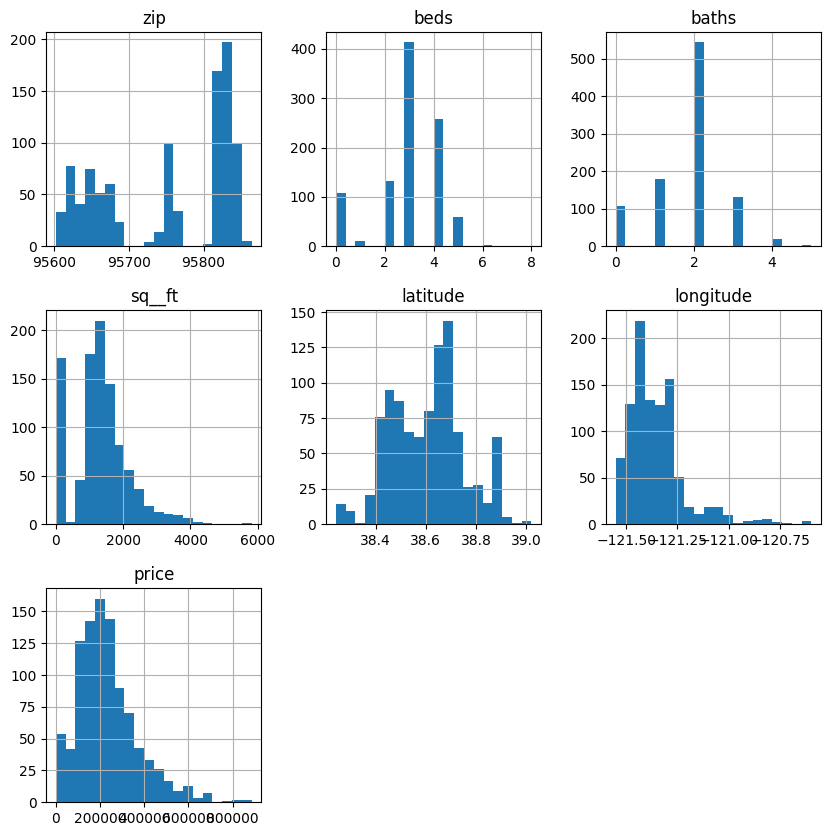

In [10]:
df.hist(bins=20,figsize=(10,10))
plt.show()

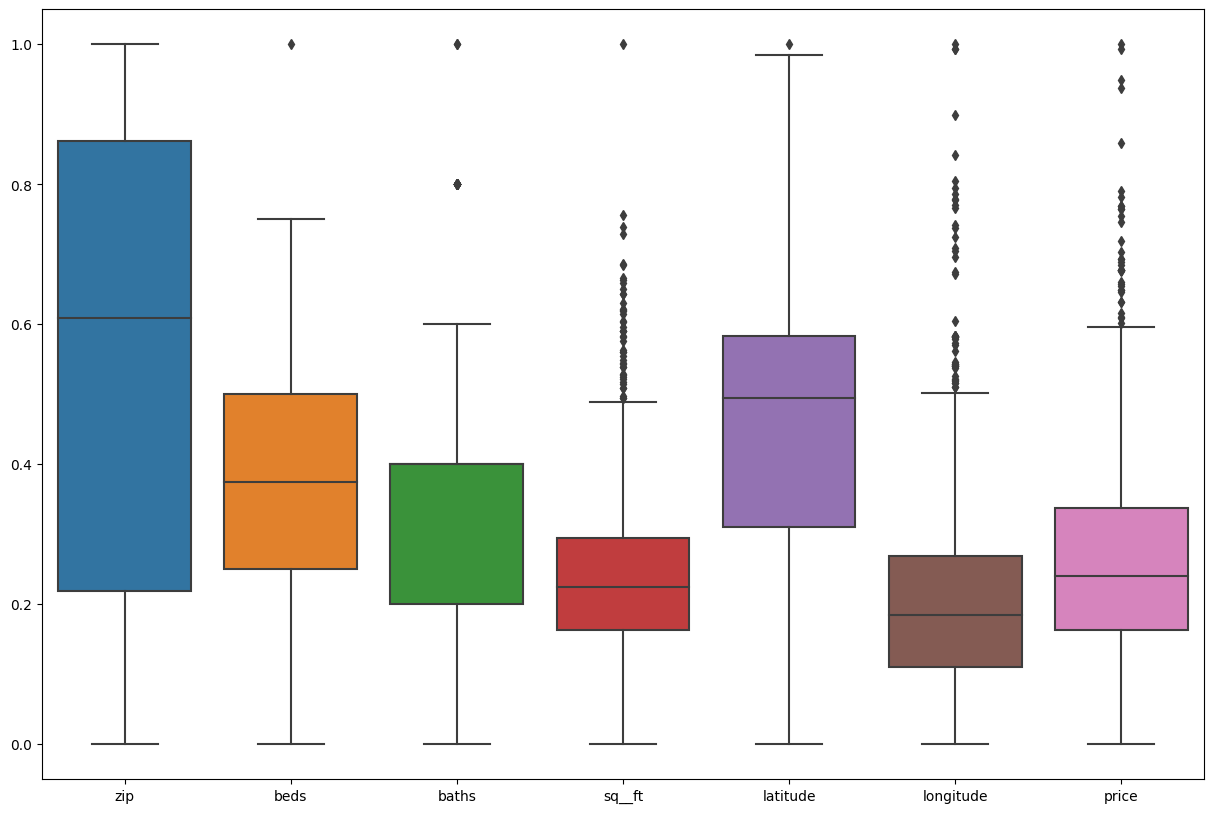

In [11]:
#isolating the numeric columns to then use a min/max scaler and visualising any outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_scaled)
plt.show()

In [12]:
df.corr(numeric_only=True)

,zip,beds,baths,sq__ft,latitude,longitude,price
zip,1.000000,0.125319,0.069165,0.130108,-0.290389,-0.539904,-0.093353
beds,0.125319,1.000000,0.839650,0.684041,-0.291307,-0.053993,0.342024
baths,0.069165,0.839650,1.000000,0.665690,-0.235792,0.016582,0.416208
sq__ft,0.130108,0.684041,0.665690,1.000000,-0.383274,-0.177742,0.333897
latitude,-0.290389,-0.291307,-0.235792,-0.383274,1.000000,0.387925,-0.039573
longitude,-0.539904,-0.053993,0.016582,-0.177742,0.387925,1.000000,0.284485
price,-0.093353,0.342024,0.416208,0.333897,-0.039573,0.284485,1.000000


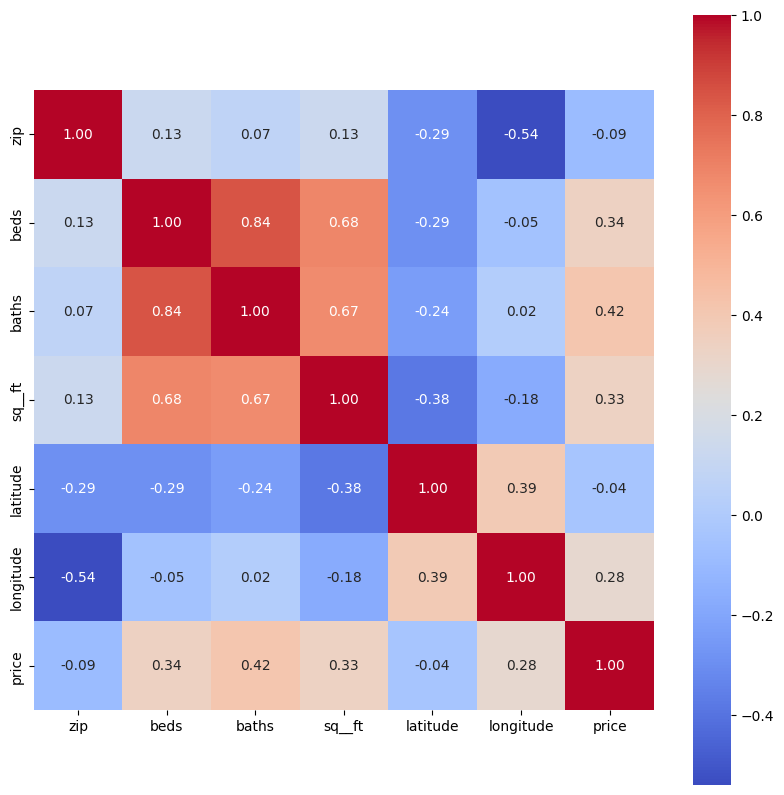

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.show()

In [14]:
def draw_scatter_plot(X, Y):
    fig = plt.figure(figsize=(15,7))
    ax = plt.gca()
    ax.scatter(X,Y)
    plt.show()

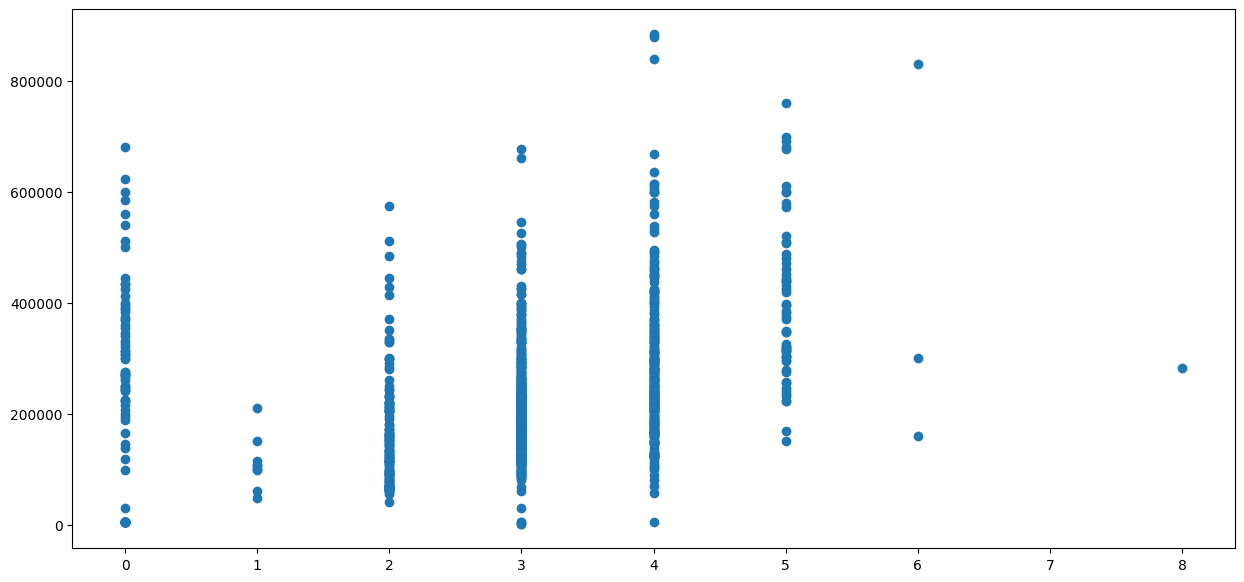

In [15]:
#Beds
draw_scatter_plot(df['beds'],df['price'])

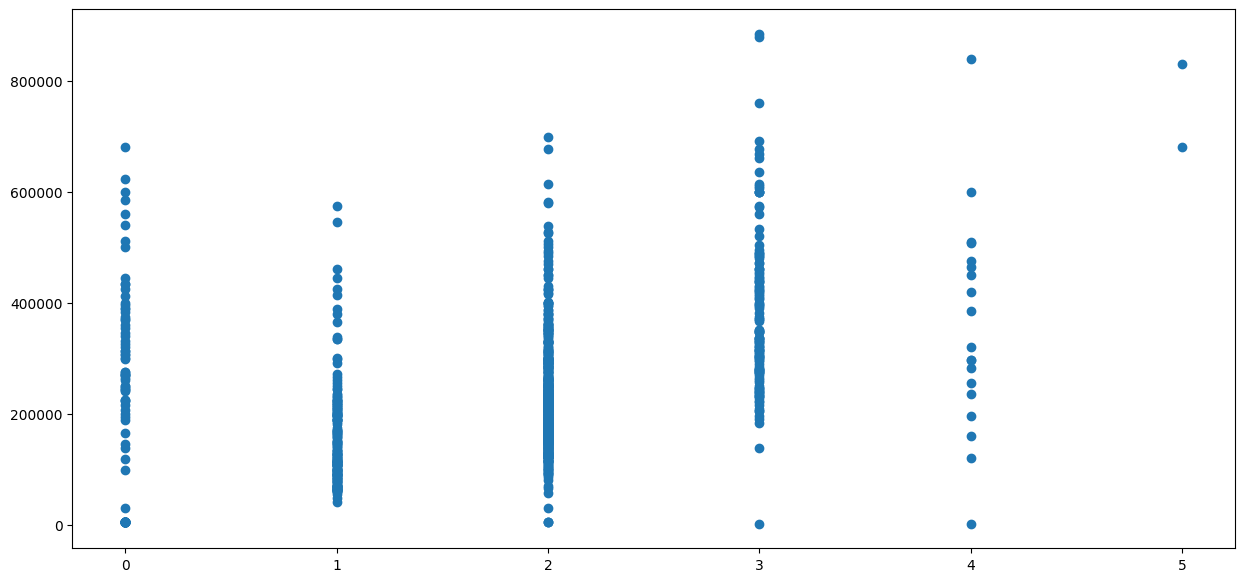

In [16]:
#Baths
draw_scatter_plot(df['baths'],df['price'])

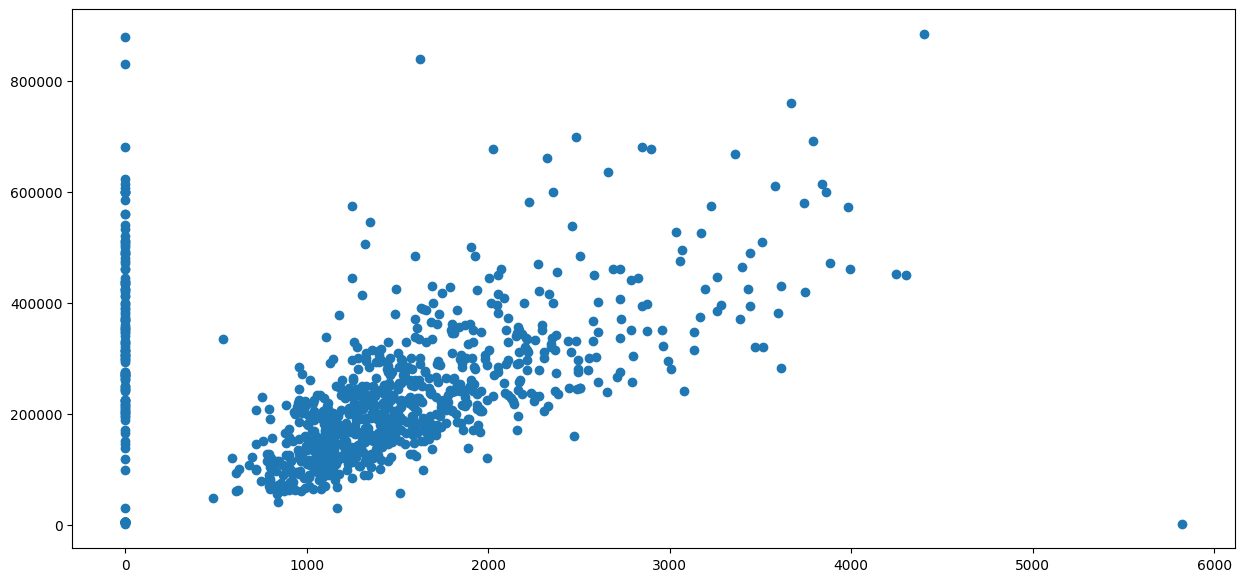

In [17]:
#Square footage
draw_scatter_plot(df['sq__ft'],df['price'])

For the sake of our model, I'm going to remove the rows where square footage = 0

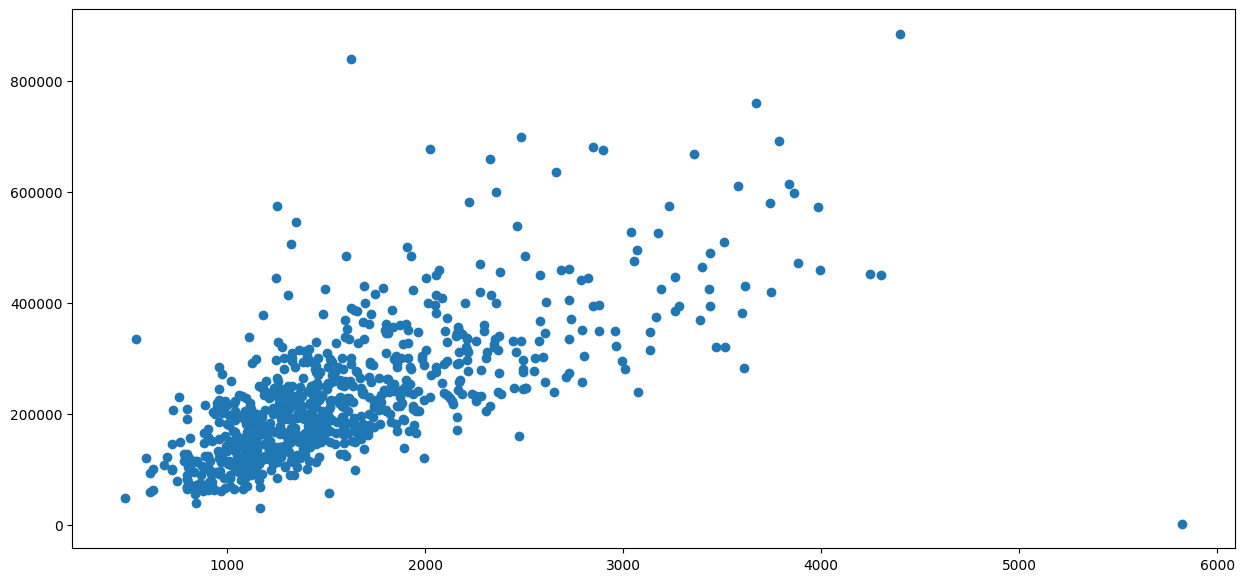

In [19]:
df_amended = df[df['sq__ft'] != 0]

draw_scatter_plot(df_amended['sq__ft'],df_amended['price'])

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [21]:
# ANSWER

#Price is likely the target variable we want to predict


#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [ ]:
# ANSWER
#beds
#baths
#sq_ft

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [22]:
# ANSWER
# Now that I have removed the rows where sq_ft = 0, the amended dataframe shows there is a strong correlation between sq_ft and price
df_amended.corr(numeric_only=True)

,zip,beds,baths,sq__ft,latitude,longitude,price
zip,1.000000,-0.072673,-0.103332,-0.101560,-0.134134,-0.562983,-0.219591
beds,-0.072673,1.000000,0.654746,0.695710,-0.107440,0.056713,0.441988
baths,-0.103332,0.654746,1.000000,0.724631,-0.081249,0.108081,0.501820
sq__ft,-0.101560,0.695710,0.724631,1.000000,-0.103287,0.135809,0.693708
latitude,-0.134134,-0.107440,-0.081249,-0.103287,1.000000,0.344431,0.058475
longitude,-0.562983,0.056713,0.108081,0.135809,0.344431,1.000000,0.278312
price,-0.219591,0.441988,0.501820,0.693708,0.058475,0.278312,1.000000


#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [23]:
from sklearn.linear_model import LinearRegression

##### 2.4.1 Fit predictor and target variables using linear regression 

In [25]:
# ANSWER

X = df_amended['sq__ft'].values.reshape(-1,1)
y = df_amended['price']

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

### 3. Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [27]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


#### 3.2 Check Shape, Sample of Test Train Data

In [28]:
# ANSWER
## Check training/test data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(545, 1) (545,)
(269, 1) (269,)


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [ ]:
# ANSWER
slr = LinearRegression()
slr.fit(X_train, y_train)

In [ ]:
# ANSWER

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [ ]:
# ANSWER

#### Find the error

In [ ]:
# Predict price from X_test



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



